In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv('data/cleaned_norm_data.csv')

X = df.drop(columns=['id', 'churn'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

log_reg = LogisticRegression()

In [5]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

Найкращі параметри:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [6]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точність: {accuracy:.2f}")
print(f"Точність (Precision): {precision:.2f}")
print(f"Повнота (Recall): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Точність: 0.71
Точність (Precision): 0.74
Повнота (Recall): 0.74
F1 Score: 0.74


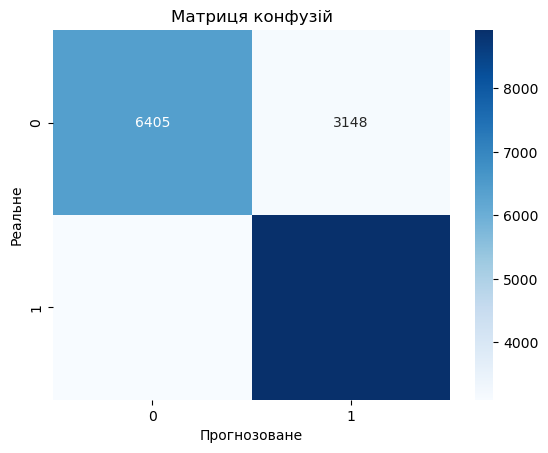

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      9553
           1       0.74      0.74      0.74     12015

    accuracy                           0.71     21568
   macro avg       0.71      0.71      0.71     21568
weighted avg       0.71      0.71      0.71     21568



In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця конфузій')
plt.xlabel('Прогнозоване')
plt.ylabel('Реальне')
plt.show()

print(classification_report(y_test, y_pred))

In [9]:
with open('log_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)